In [ ]:
# import os
import tensorflow as tf
from tensorflow.keras import optimizers,Model,Sequential,models
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
# tf.random.set_seed(1234)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Sequential API (Very convenient, not very flexible)

In [ ]:
# # Sequential API - Add Method
model = Sequential()
model.add(Dense(512, activation="relu", input_dim=784))
model.add(Dense(256, activation="relu", name="second_hidden_layer"))
model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
## Sequential API - Constructor with a List of Layers:
model1 = Sequential(

   [
        Dense(512, activation="relu", input_dim=784),
        Dense(256, activation="relu"),
        Dense(10,activation='softmax'),
    ]
)

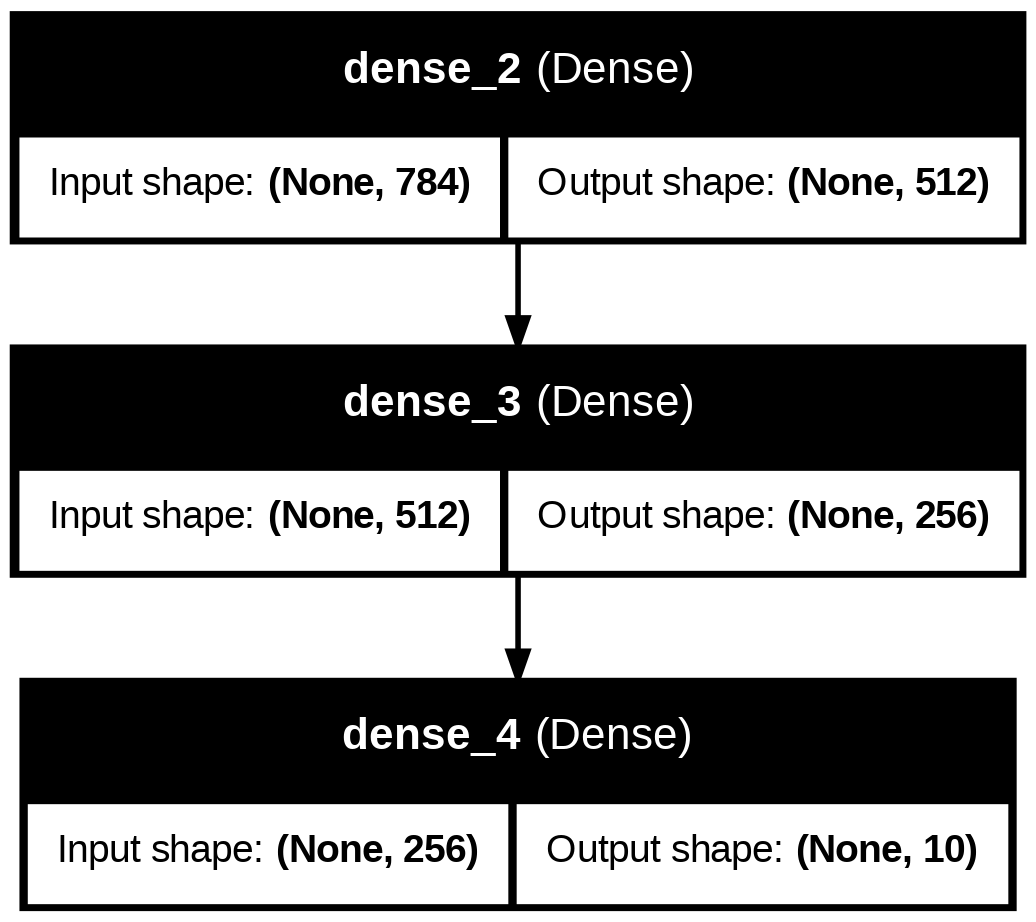

In [ ]:
plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

# Functional API (A bit more flexible)

In [ ]:
from tensorflow.keras import Model

# Define the input shape
input_tensor = Input(shape=(784,))

# Create layers and chain them together
x = Dense(512, activation='relu')(input_tensor)
x = Dense(256, activation='relu', name="second_hidden_layer")(x)
output_tensor = Dense(10, activation='softmax')(x)

# Create the model by specifying the input and output tensors
model2 = Model(inputs=input_tensor, outputs=output_tensor)

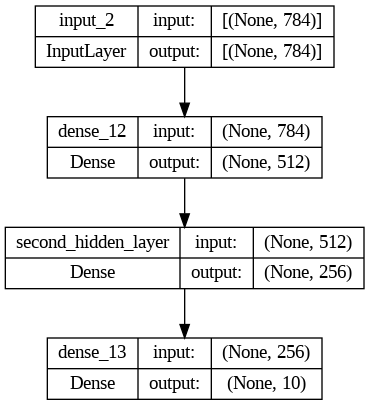

In [ ]:
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 second_hidden_layer (Dense  (None, 256)               131328    
 )                                                               
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],)


In [ ]:
y_train.shape

(60000,)

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 13s - loss: 0.1857 - accuracy: 0.9431 - 13s/epoch - 7ms/step
Epoch 2/5
1875/1875 - 11s - loss: 0.0798 - accuracy: 0.9753 - 11s/epoch - 6ms/step
Epoch 3/5
1875/1875 - 11s - loss: 0.0555 - accuracy: 0.9824 - 11s/epoch - 6ms/step
Epoch 4/5
1875/1875 - 11s - loss: 0.0406 - accuracy: 0.9872 - 11s/epoch - 6ms/step
Epoch 5/5
1875/1875 - 11s - loss: 0.0322 - accuracy: 0.9898 - 11s/epoch - 6ms/step
313/313 - 2s - loss: 0.0718 - accuracy: 0.9794 - 2s/epoch - 7ms/step


[0.0717858225107193, 0.9793999791145325]

# Functional API (A bit more flexible)

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import optimizers, Model, Sequential, models
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Add

# Define the inputs with the correct import
inputs = Input(shape=(32, 32, 3), name="img")
x = Conv2D(32, 3, activation="relu")(inputs)
x = Conv2D(64, 3, activation="relu")(x)
block_1_output = MaxPooling2D(3)(x)

x = Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = Add()([x, block_1_output])

x = Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = Conv2D(64, 3, activation="relu", padding="same")(x)
# Use the Add layer again
block_3_output = Add()([x, block_2_output])

x = Conv2D(64, 3, activation="relu")(block_3_output)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(10)(x)

# Create the model using the Model class imported from tensorflow.keras
model = Model(inputs, outputs, name="toy_resnet")
# Print the model summary to verify the architecture
model.summary()


Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 9, 9, 64)             0         ['conv2d_1[0][0]']            
 D)                                                                                      

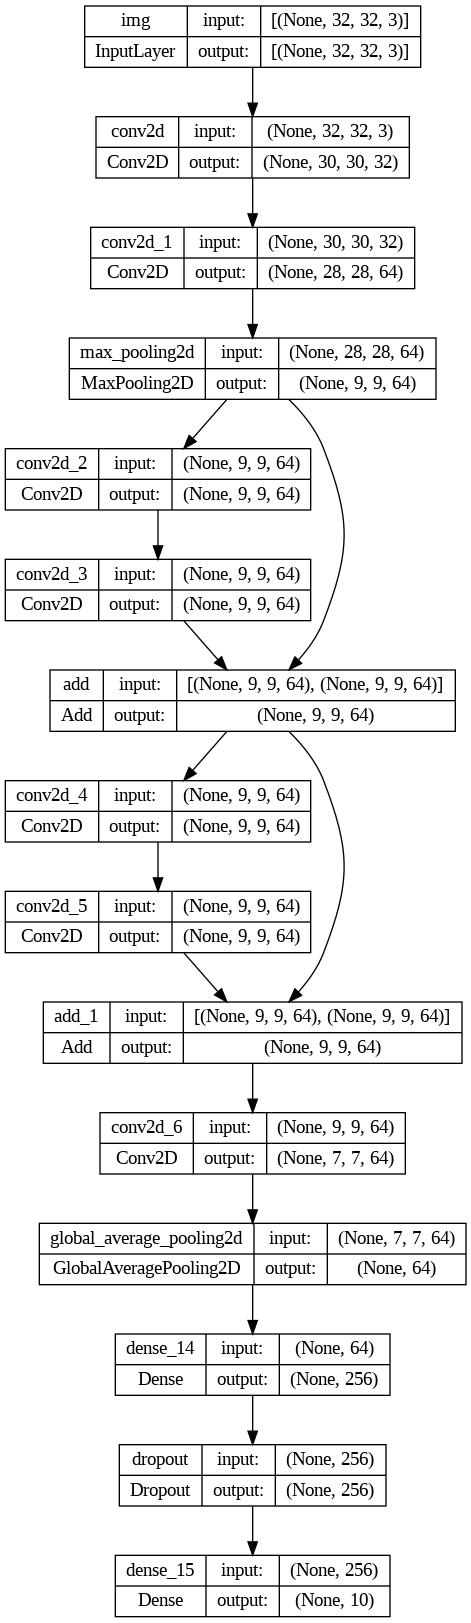

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Tickets Classification
Models with multiple inputs and outputs
The functional API makes it easy to manipulate multiple inputs and outputs. This cannot be handled with the Sequential API.

For example, if you're building a system for ranking customer issue tickets by priority and routing them to the correct department, then the model will have

**three inputs:**

the title of the ticket (text input),

the text body of the ticket (text input), and

any tags added by the user (categorical input)

**This model will have two outputs:**

the priority score between 0 and 1 (scalar sigmoid output),

 and the department that should handle the ticket (softmax output over the set of departments).

### **You can build this model in a few lines with the functional API:**

Example 1:

**Ticket Titl**e: "Login Issue - Cannot Reset Password"

**Ticket Body**:

"Hi there,

I've been trying to reset my password for the past hour, but I'm not receiving the password reset email.
I've checked my spam and junk folders, but it's not there either. Could you please assist me in resetting my password?

Thank you,
[Customer Name]"

**Ticket Tags: ["login issue", "password reset", "email not received"]**

**Model Output**: Priority Score = 0.65, Department = "Customer Service"

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import optimizers, Model, Sequential, models
from tensorflow.keras.layers import Dense, Input, Embedding, LSTM, concatenate

num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

# Define the model inputs
title_input = Input(shape=(None,), name="title")  # Variable-length sequence of ints
body_input = Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = Input(shape=(num_tags,), name="tags")  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector and then apply LSTM
title_features = Embedding(num_words, 64)(title_input)
title_features = LSTM(128)(title_features)

# Embed each word in the body into a 64-dimensional vector and then apply LSTM
body_features = Embedding(num_words, 64)(body_input)
body_features = LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = Model(inputs=[title_input, body_input, tags_input], outputs=[priority_pred, department_pred])


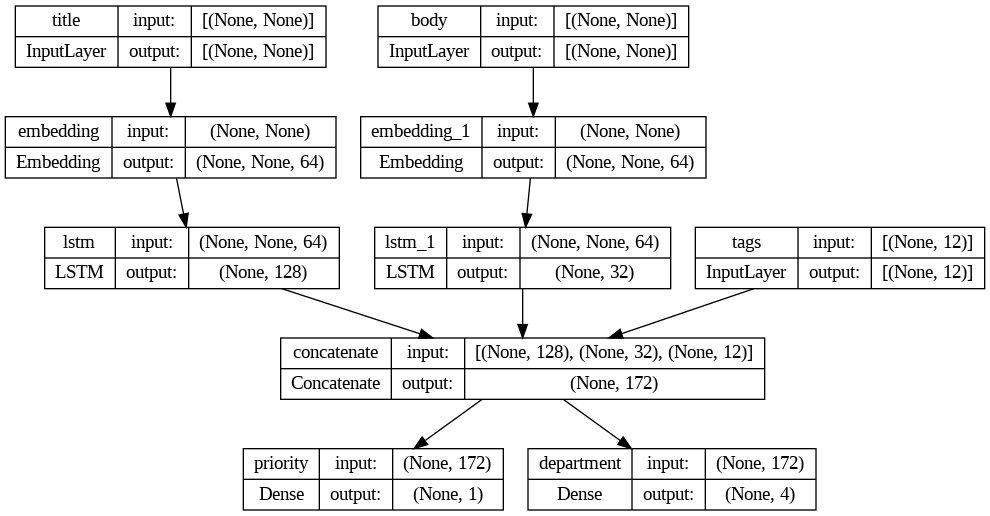

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(
    optimizer=RMSprop(1e-3),
    loss={
        "priority": BinaryCrossentropy(from_logits=True),
        "department": CategoricalCrossentropy(from_logits=True),
    },
    loss_weights={"priority": 1.0, "department": 0.2},
)

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Assuming num_words, num_tags, and num_departments are defined as before

# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(num_departments, size=(1280, 1))
dept_targets = to_categorical(dept_targets, num_classes=num_departments)

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 8s 88ms/step - loss: 0.9784 - priority_loss: 0.6973 - department_loss: 1.4052
Epoch 2/2
40/40 [==============================] - 3s 69ms/step - loss: 0.9756 - priority_loss: 0.6954 - department_loss: 1.4008


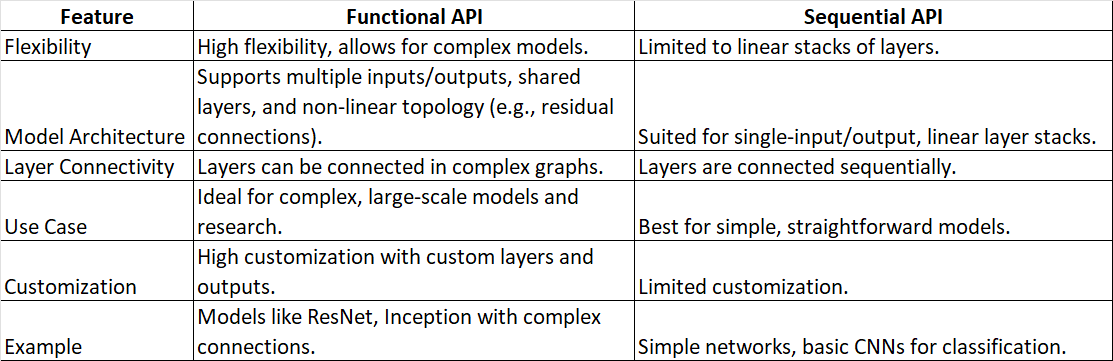